# **Random Forest algorithmes**

In [ ]:
# ipynb-py-convert RandomForest.ipynb RF.py => to convert files

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **preprocessing**

In [2]:
# Étape 1 : Charger le dataset
# Remplacez 'your_dataset.csv' par le chemin de votre fichier CSV
data_path = "../data/Training_Test_data/data_updated.csv"
df = pd.read_csv(data_path , sep=',')

In [3]:
# Vérifiez les premières lignes du dataset
print("Aperçu des données:")
print(df.head(5))

Aperçu des données:
     lat   lon  Fall_PSurf_max  Spring_PSurf_max  Summer_PSurf_max  \
0  19.25  3.25       96362.650          96121.89         96049.660   
1  19.25  3.75       96909.730          96656.82         96577.516   
2  19.25  4.25       96777.850          96554.19         96454.620   
3  19.25  4.75       96611.734          96413.43         96306.016   
4  19.75  3.25       95446.060          95256.15         95176.220   

   Winter_PSurf_max  Fall_PSurf_mean  Spring_PSurf_mean  Summer_PSurf_mean  \
0         96788.164     95688.851891       95407.183172       95446.575419   
1         97352.400     96214.997685       95922.583910       95959.542969   
2         97243.960     96091.613643       95800.180887       95836.925156   
3         97093.560     95934.689069       95644.225843       95684.333149   
4         95915.000     94815.465598       94546.493361       94580.676228   

   Winter_PSurf_mean  ...  CEC topsoil  CEC subsoil  CEC clay topsoil  \
0       95997.920

In [4]:
print(df.columns)

Index(['lat', 'lon', 'Fall_PSurf_max', 'Spring_PSurf_max', 'Summer_PSurf_max',
       'Winter_PSurf_max', 'Fall_PSurf_mean', 'Spring_PSurf_mean',
       'Summer_PSurf_mean', 'Winter_PSurf_mean', 'Fall_PSurf_min',
       'Spring_PSurf_min', 'Summer_PSurf_min', 'Winter_PSurf_min',
       'Fall_Qair_max', 'Spring_Qair_max', 'Summer_Qair_max',
       'Winter_Qair_max', 'Fall_Qair_mean', 'Spring_Qair_mean',
       'Summer_Qair_mean', 'Winter_Qair_mean', 'Fall_Qair_min',
       'Spring_Qair_min', 'Summer_Qair_min', 'Winter_Qair_min',
       'Fall_Rainf_max', 'Spring_Rainf_max', 'Summer_Rainf_max',
       'Winter_Rainf_max', 'Fall_Rainf_mean', 'Spring_Rainf_mean',
       'Summer_Rainf_mean', 'Winter_Rainf_mean', 'Fall_Rainf_min',
       'Spring_Rainf_min', 'Summer_Rainf_min', 'Winter_Rainf_min',
       'Fall_Snowf_max', 'Spring_Snowf_max', 'Summer_Snowf_max',
       'Winter_Snowf_max', 'Fall_Snowf_mean', 'Spring_Snowf_mean',
       'Summer_Snowf_mean', 'Winter_Snowf_mean', 'Fall_Snowf_min',
 

In [5]:
# Supprimer les colonnes qui se terminent par 'min' ou 'max'
df = df.drop(df.filter(regex='(min|max)$').columns, axis=1)

In [6]:
print(df.columns)

Index(['lat', 'lon', 'Fall_PSurf_mean', 'Spring_PSurf_mean',
       'Summer_PSurf_mean', 'Winter_PSurf_mean', 'Fall_Qair_mean',
       'Spring_Qair_mean', 'Summer_Qair_mean', 'Winter_Qair_mean',
       'Fall_Rainf_mean', 'Spring_Rainf_mean', 'Summer_Rainf_mean',
       'Winter_Rainf_mean', 'Fall_Snowf_mean', 'Spring_Snowf_mean',
       'Summer_Snowf_mean', 'Winter_Snowf_mean', 'Fall_Tair_mean',
       'Spring_Tair_mean', 'Summer_Tair_mean', 'Winter_Tair_mean',
       'Fall_Wind_mean', 'Spring_Wind_mean', 'Summer_Wind_mean',
       'Winter_Wind_mean', 'geometry', 'index_right', 'sand % topsoil',
       'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
       'clay % subsoil', 'pH water topsoil', 'pH water subsoil',
       'OC % topsoil', 'OC % subsoil', 'N % topsoil', 'N % subsoil',
       'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
       'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil',
       'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil

In [7]:
# Étape 2 : Vérification des données manquantes
print("\nStatistiques des valeurs manquantes:")
print(df.isnull().sum())


Statistiques des valeurs manquantes:
lat                  0
lon                  0
Fall_PSurf_mean      0
Spring_PSurf_mean    0
Summer_PSurf_mean    0
Winter_PSurf_mean    0
Fall_Qair_mean       0
Spring_Qair_mean     0
Summer_Qair_mean     0
Winter_Qair_mean     0
Fall_Rainf_mean      0
Spring_Rainf_mean    0
Summer_Rainf_mean    0
Winter_Rainf_mean    0
Fall_Snowf_mean      0
Spring_Snowf_mean    0
Summer_Snowf_mean    0
Winter_Snowf_mean    0
Fall_Tair_mean       0
Spring_Tair_mean     0
Summer_Tair_mean     0
Winter_Tair_mean     0
Fall_Wind_mean       0
Spring_Wind_mean     0
Summer_Wind_mean     0
Winter_Wind_mean     0
geometry             0
index_right          2
sand % topsoil       2
sand % subsoil       2
silt % topsoil       2
silt% subsoil        2
clay % topsoil       2
clay % subsoil       2
pH water topsoil     2
pH water subsoil     2
OC % topsoil         2
OC % subsoil         2
N % topsoil          2
N % subsoil          2
BS % topsoil         2
BS % subsoil       

In [8]:
# Remplissage ou suppression des valeurs manquantes (Exemple: suppression)
df = df.dropna()

In [9]:
# Sélectionner les colonnes numériques à normaliser
columns_to_normalize = ['Fall_PSurf_mean', 'Spring_PSurf_mean', 'Summer_PSurf_mean', 'Winter_PSurf_mean',
                        'Fall_Qair_mean', 'Spring_Qair_mean', 'Summer_Qair_mean', 'Winter_Qair_mean',
                        'Fall_Rainf_mean', 'Spring_Rainf_mean', 'Summer_Rainf_mean', 'Winter_Rainf_mean',
                        'Fall_Snowf_mean', 'Spring_Snowf_mean', 'Summer_Snowf_mean', 'Winter_Snowf_mean',
                        'Fall_Tair_mean', 'Spring_Tair_mean', 'Summer_Tair_mean', 'Winter_Tair_mean',
                        'Fall_Wind_mean', 'Spring_Wind_mean', 'Summer_Wind_mean', 'Winter_Wind_mean',
                        'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
                        'clay % subsoil', 'pH water topsoil', 'pH water subsoil', 'OC % topsoil', 'OC % subsoil',
                        'N % topsoil', 'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
                        'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil',
                        'BD subsoil', 'C/N topsoil', 'C/N subsoil']

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Appliquer le scaler aux colonnes sélectionnées
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [10]:
df

,lat,lon,Fall_PSurf_mean,Spring_PSurf_mean,Summer_PSurf_mean,Winter_PSurf_mean,Fall_Qair_mean,Spring_Qair_mean,Summer_Qair_mean,Winter_Qair_mean,...,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil
0,19.25,3.25,0.715987,0.711952,0.711822,0.712600,0.167288,0.211318,0.453284,0.201368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,19.25,3.75,0.740597,0.736342,0.736393,0.737106,0.153214,0.206133,0.436666,0.194863,...,0.220365,0.208388,0.876494,0.704225,0.390578,0.503876,0.815217,0.760870,0.384615,0.68750
2,19.25,4.25,0.734826,0.730549,0.730519,0.731318,0.154547,0.212596,0.423964,0.197594,...,0.220365,0.208388,0.876494,0.704225,0.390578,0.503876,0.815217,0.760870,0.384615,0.68750
4,19.75,3.25,0.675135,0.671223,0.670347,0.672390,0.128757,0.164859,0.386399,0.179622,...,0.131712,0.105513,0.365206,0.197183,0.001491,0.005700,0.326087,0.407609,0.264423,0.25000
5,19.75,3.75,0.703261,0.698991,0.698185,0.700375,0.122039,0.159077,0.360461,0.176640,...,0.131712,0.105513,0.365206,0.197183,0.001491,0.005700,0.326087,0.407609,0.264423,0.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,36.75,6.25,0.759708,0.768804,0.771940,0.765964,0.771392,0.794850,0.747227,0.793683,...,0.174519,0.327618,0.285525,0.504225,0.000894,0.002052,0.967391,0.967391,1.000000,0.75625
852,36.75,6.75,0.824687,0.834484,0.836913,0.830241,0.795485,0.797414,0.782831,0.822217,...,0.174519,0.327618,0.285525,0.504225,0.000894,0.002052,0.967391,0.967391,1.000000,0.75625
853,36.75,7.25,0.863529,0.874116,0.875757,0.868317,0.828288,0.793065,0.757406,0.868328,...,0.378419,0.374308,0.565737,0.595775,0.146094,0.276790,0.684783,0.739130,0.485577,0.40000
854,36.75,7.75,0.890514,0.901151,0.902244,0.894524,0.865666,0.805657,0.741799,0.916422,...,1.000000,1.000000,0.985392,1.000000,0.188730,0.154355,0.836957,0.858696,0.447115,0.60000


In [11]:
# df.to_csv('data_for_Qair_pred.csv')

In [12]:
# # Dataset pour l'automne (Fall)
# fall_columns = ['lat', 'lon', 'Fall_PSurf_mean', 'Fall_Qair_mean', 'Fall_Rainf_mean', 'Fall_Snowf_mean',
#                 'Fall_Tair_mean', 'Fall_Wind_mean' , 'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
#                         'clay % subsoil', 'pH water topsoil', 'pH water subsoil', 'OC % topsoil', 'OC % subsoil',
#                         'N % topsoil', 'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
#                         'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil',
#                         'BD subsoil', 'C/N topsoil', 'C/N subsoil','geometry']
# df_fall = df[fall_columns]

# # Dataset pour le printemps (Spring)
# spring_columns = ['lat', 'lon', 'Spring_PSurf_mean', 'Spring_Qair_mean', 'Spring_Rainf_mean', 'Spring_Snowf_mean',
#                   'Spring_Tair_mean', 'Spring_Wind_mean' ,'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
#                         'clay % subsoil', 'pH water topsoil', 'pH water subsoil', 'OC % topsoil', 'OC % subsoil',
#                         'N % topsoil', 'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
#                         'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil',
#                         'BD subsoil', 'C/N topsoil', 'C/N subsoil', 'geometry']
# df_spring = df[spring_columns]

# # Dataset pour l'été (Summer)
# summer_columns = ['lat', 'lon', 'Summer_PSurf_mean', 'Summer_Qair_mean', 'Summer_Rainf_mean', 'Summer_Snowf_mean',
#                   'Summer_Tair_mean', 'Summer_Wind_mean' ,'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
#                         'clay % subsoil', 'pH water topsoil', 'pH water subsoil', 'OC % topsoil', 'OC % subsoil',
#                         'N % topsoil', 'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
#                         'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil',
#                         'BD subsoil', 'C/N topsoil', 'C/N subsoil', 'geometry']
# df_summer = df[summer_columns]

# # Dataset pour l'hiver (Winter)
# winter_columns = ['lat', 'lon', 'Winter_PSurf_mean', 'Winter_Qair_mean', 'Winter_Rainf_mean', 'Winter_Snowf_mean',
#                   'Winter_Tair_mean', 'Winter_Wind_mean','sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
#                         'clay % subsoil', 'pH water topsoil', 'pH water subsoil', 'OC % topsoil', 'OC % subsoil',
#                         'N % topsoil', 'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
#                         'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil',
#                         'BD subsoil', 'C/N topsoil', 'C/N subsoil', 'geometry']
# df_winter = df[winter_columns]

# # Affichage des 5 premières lignes de chaque dataset
# df_fall.to_csv('data_for_Qair_fall_pred.csv')
# print("Dataset Fall:")
# print(df_fall.head())
# df_spring.to_csv('data_for_Qair_spring_pred.csv')
# print("\nDataset Spring:")
# print(df_spring.head())
# df_summer.to_csv('data_for_Qair_summer_pred.csv')
# print("\nDataset Summer:")
# print(df_summer.head())
# df_winter.to_csv('data_for_Qair_winter_pred.csv')
# print("\nDataset Winter:")
# print(df_winter.head())

In [13]:
target_column = ['geometry','lat','lon','index_right']
df = df.drop(columns=target_column)

In [14]:
df.columns

Index(['Fall_PSurf_mean', 'Spring_PSurf_mean', 'Summer_PSurf_mean',
       'Winter_PSurf_mean', 'Fall_Qair_mean', 'Spring_Qair_mean',
       'Summer_Qair_mean', 'Winter_Qair_mean', 'Fall_Rainf_mean',
       'Spring_Rainf_mean', 'Summer_Rainf_mean', 'Winter_Rainf_mean',
       'Fall_Snowf_mean', 'Spring_Snowf_mean', 'Summer_Snowf_mean',
       'Winter_Snowf_mean', 'Fall_Tair_mean', 'Spring_Tair_mean',
       'Summer_Tair_mean', 'Winter_Tair_mean', 'Fall_Wind_mean',
       'Spring_Wind_mean', 'Summer_Wind_mean', 'Winter_Wind_mean',
       'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
       'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
       'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
       'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
       'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
       'C/N topsoil', 'C/N subsoil'],
      d

In [15]:
# Define the target columns and feature columns
target_columns = ['Fall_Qair_mean', 'Spring_Qair_mean', 'Summer_Qair_mean', 'Winter_Qair_mean']
feature_columns = [col for col in df.columns if col not in target_columns]

# Split the data into features (X) and target (Y)
X = df[feature_columns]
Y = df[target_columns]


In [16]:
X.columns

Index(['Fall_PSurf_mean', 'Spring_PSurf_mean', 'Summer_PSurf_mean',
       'Winter_PSurf_mean', 'Fall_Rainf_mean', 'Spring_Rainf_mean',
       'Summer_Rainf_mean', 'Winter_Rainf_mean', 'Fall_Snowf_mean',
       'Spring_Snowf_mean', 'Summer_Snowf_mean', 'Winter_Snowf_mean',
       'Fall_Tair_mean', 'Spring_Tair_mean', 'Summer_Tair_mean',
       'Winter_Tair_mean', 'Fall_Wind_mean', 'Spring_Wind_mean',
       'Summer_Wind_mean', 'Winter_Wind_mean', 'sand % topsoil',
       'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
       'clay % subsoil', 'pH water topsoil', 'pH water subsoil',
       'OC % topsoil', 'OC % subsoil', 'N % topsoil', 'N % subsoil',
       'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
       'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil',
       'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil', 'C/N topsoil',
       'C/N subsoil'],
      dtype='object')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculer la matrice de corrélation
correlation_matrix = X.corr()

# Dessiner un heatmap des corrélations sans afficher les valeurs
# plt.figure(figsize=(10, 8))  # Ajuster la taille du plot
# sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)

# plt.title("Heatmap des corrélations")
# plt.show()

# la colonne summer_snow_mean = 0 du coup sa correlation = Nan

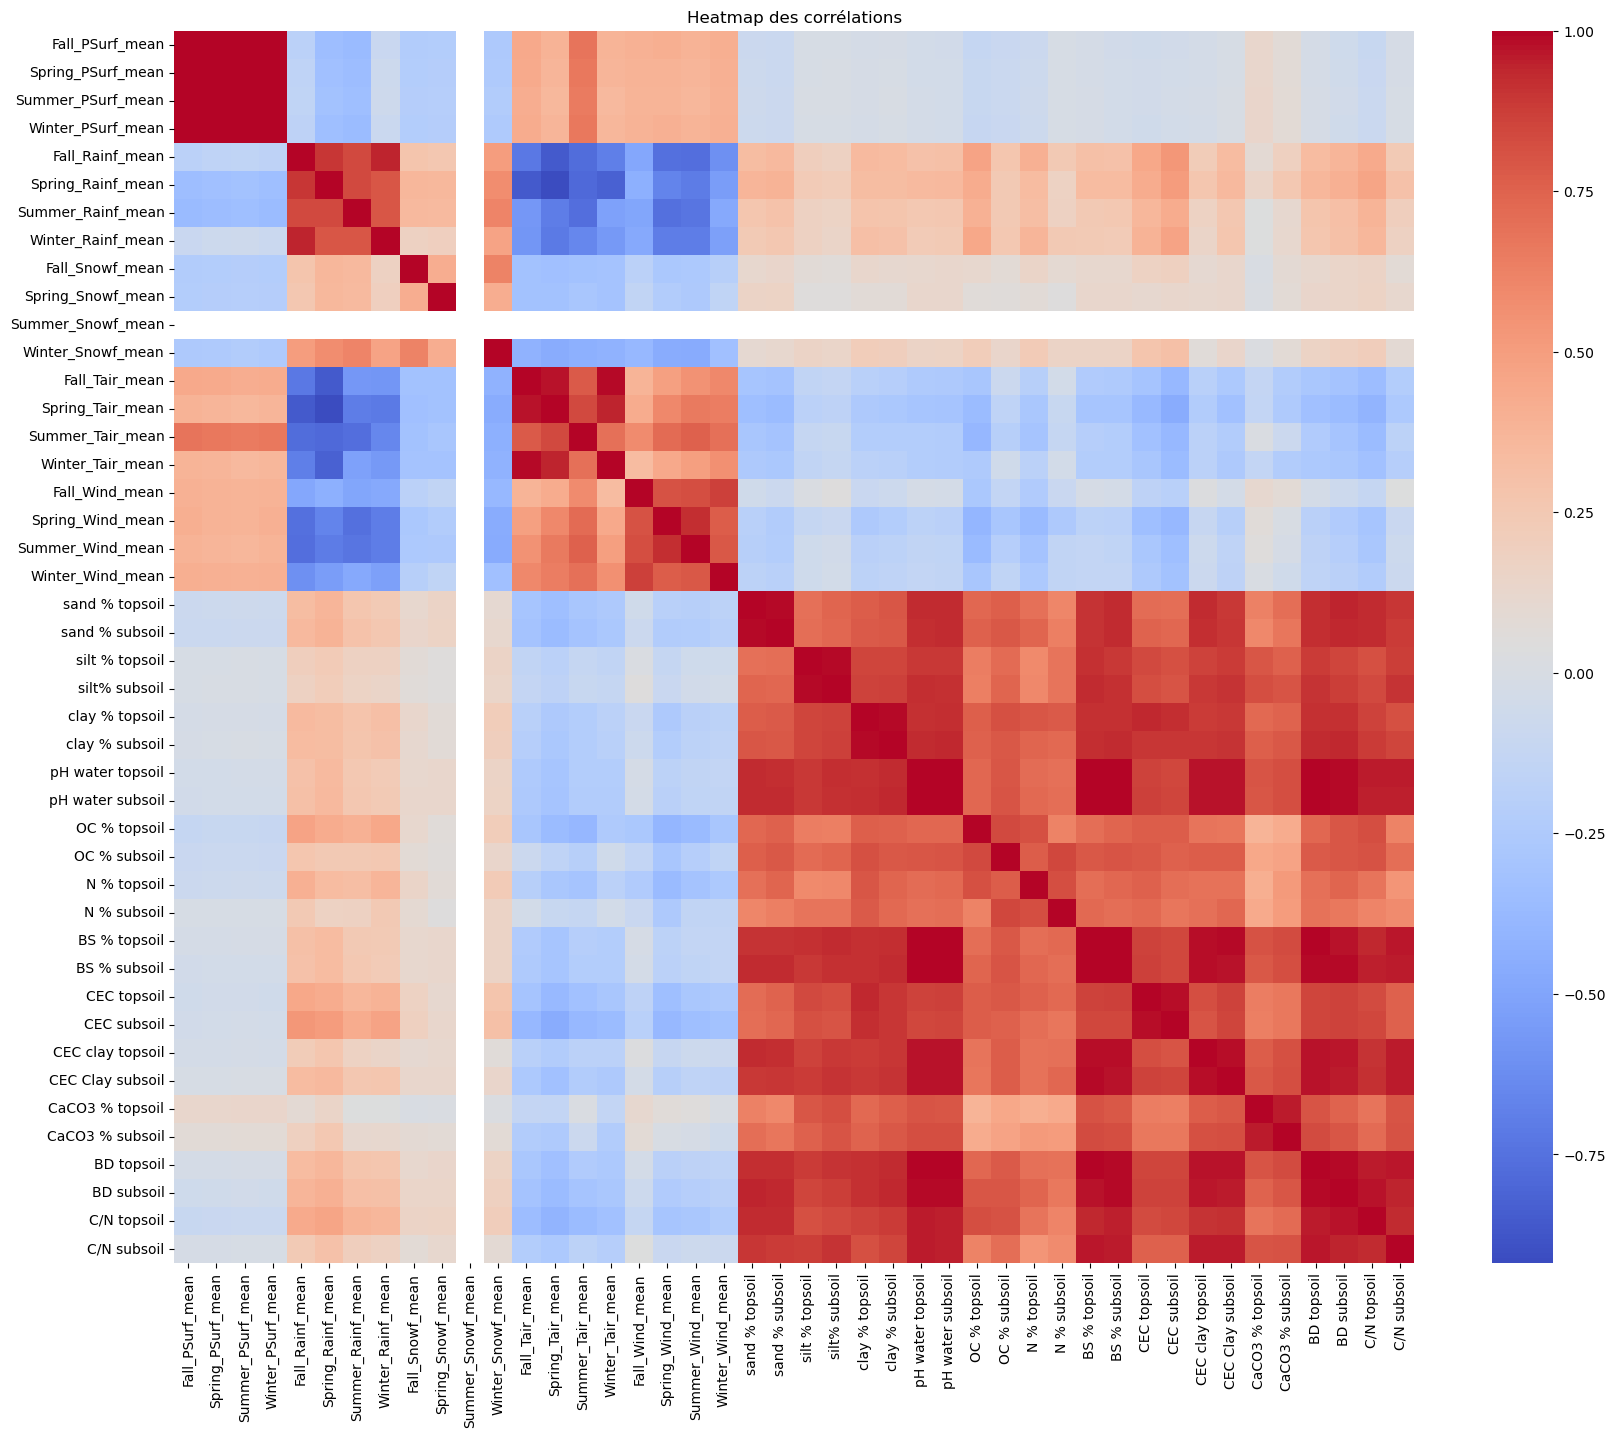

In [18]:
plt.figure(figsize=(20, 16))  # Augmenter la taille du plot
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Heatmap des corrélations")
plt.show()

In [20]:
# Identifier les colonnes à supprimer (corrélation > 0.95)
to_drop = set()
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[0]):  # Comparer seulement la moitié supérieure de la matrice
        if abs(correlation_matrix.iloc[i, j]) > 0.95:  # Corrélation > 0.95 (positive ou négative)
            col_to_drop = correlation_matrix.columns[j]
            to_drop.add(col_to_drop)

# Réduire le dataset
reduced_df = X.drop(columns=to_drop)

# Afficher les colonnes supprimées
print("Colonnes supprimées :", to_drop)

# Afficher le dataset réduit
print("Shape du dataset initial :", X.shape)
print("Shape du dataset réduit :", reduced_df.shape)

Colonnes supprimées : {'silt% subsoil', 'BS % topsoil', 'Winter_PSurf_mean', 'clay % subsoil', 'CaCO3 % subsoil', 'pH water subsoil', 'sand % subsoil', 'Summer_PSurf_mean', 'Spring_Tair_mean', 'C/N subsoil', 'CEC Clay subsoil', 'CEC clay topsoil', 'BD subsoil', 'CEC subsoil', 'C/N topsoil', 'BD topsoil', 'Spring_PSurf_mean', 'Winter_Tair_mean', 'BS % subsoil'}
Shape du dataset initial : (854, 44)
Shape du dataset réduit : (854, 25)


In [21]:
correlation_matrix = reduced_df.corr()

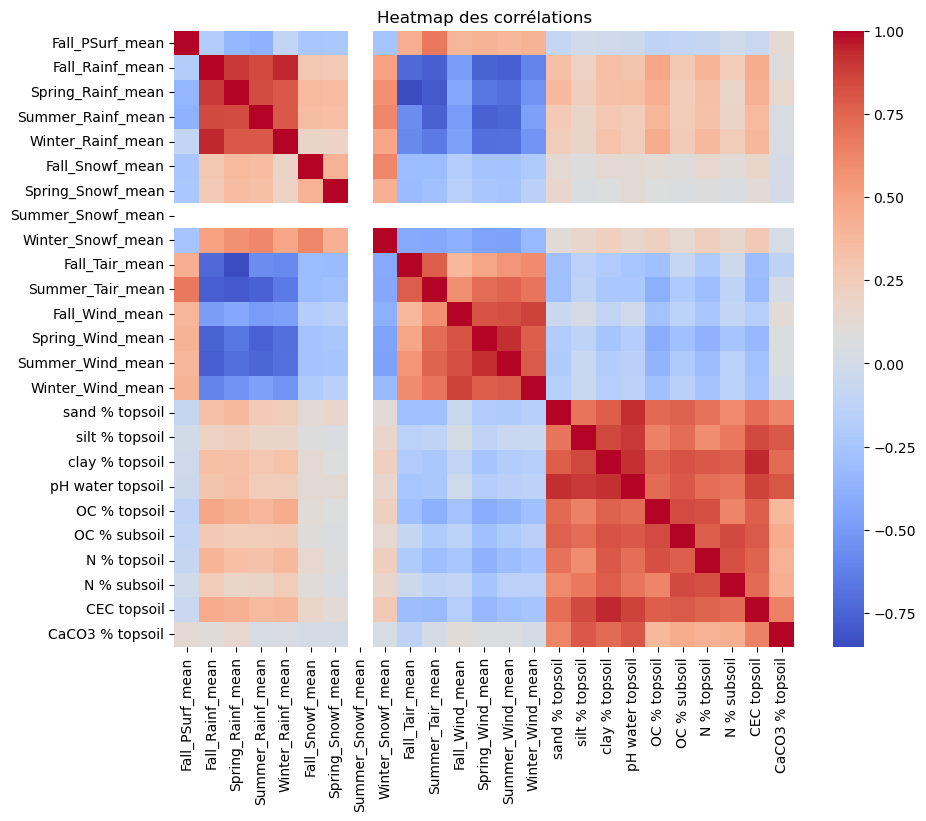

In [23]:
plt.figure(figsize=(10, 8))  # Augmenter la taille du plot
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Heatmap des corrélations")
plt.show()

In [16]:
X = reduced_df
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Save the datasets to the specified repository
X_train.to_csv('../data/rd_training_data/X_train.csv', index=False)
X_test.to_csv('../data/rd_training_data/X_test.csv', index=False)
y_train.to_csv('../data/rd_training_data/y_train.csv', index=False)
y_test.to_csv('../data/rd_training_data/y_test.csv', index=False)

## **data Split**

In [15]:
# Définir les colonnes cibles et les colonnes explicatives
qair_columns = ['Fall_Qair_mean', 'Spring_Qair_mean', 'Summer_Qair_mean', 'Winter_Qair_mean']
features_columns = [col for col in df.columns if col not in qair_columns]

In [18]:
# Diviser les données en ensembles d'entraînement et de test
# X = df[features_columns].values
# Y = df[qair_columns].values

X = df[features_columns]
Y = df[qair_columns]

In [19]:
X

,lat,lon,Fall_PSurf_mean,Spring_PSurf_mean,Summer_PSurf_mean,Winter_PSurf_mean,Fall_Rainf_mean,Spring_Rainf_mean,Summer_Rainf_mean,Winter_Rainf_mean,...,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil
0,19.25,3.25,0.715987,0.711952,0.711822,0.712600,0.000000,0.034467,0.504589,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,19.25,3.75,0.740597,0.736342,0.736393,0.737106,0.000000,0.050400,0.535968,0.000000,...,0.220365,0.208388,0.876494,0.704225,0.390578,0.503876,0.815217,0.760870,0.384615,0.68750
2,19.25,4.25,0.734826,0.730549,0.730519,0.731318,0.000000,0.028436,0.586151,0.000000,...,0.220365,0.208388,0.876494,0.704225,0.390578,0.503876,0.815217,0.760870,0.384615,0.68750
4,19.75,3.25,0.675135,0.671223,0.670347,0.672390,0.000000,0.019903,0.444352,0.000000,...,0.131712,0.105513,0.365206,0.197183,0.001491,0.005700,0.326087,0.407609,0.264423,0.25000
5,19.75,3.75,0.703261,0.698991,0.698185,0.700375,0.000000,0.010883,0.408892,0.000000,...,0.131712,0.105513,0.365206,0.197183,0.001491,0.005700,0.326087,0.407609,0.264423,0.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,36.75,6.25,0.759708,0.768804,0.771940,0.765964,0.850751,0.757786,0.808878,0.808952,...,0.174519,0.327618,0.285525,0.504225,0.000894,0.002052,0.967391,0.967391,1.000000,0.75625
852,36.75,6.75,0.824687,0.834484,0.836913,0.830241,0.905015,0.761129,0.777882,0.894813,...,0.174519,0.327618,0.285525,0.504225,0.000894,0.002052,0.967391,0.967391,1.000000,0.75625
853,36.75,7.25,0.863529,0.874116,0.875757,0.868317,0.892714,0.818705,0.774465,0.981469,...,0.378419,0.374308,0.565737,0.595775,0.146094,0.276790,0.684783,0.739130,0.485577,0.40000
854,36.75,7.75,0.890514,0.901151,0.902244,0.894524,0.977738,0.785073,0.760411,1.000000,...,1.000000,1.000000,0.985392,1.000000,0.188730,0.154355,0.836957,0.858696,0.447115,0.60000


In [15]:
# def train_test_split_custom(X, Y, test_size=0.2, random_state=42):
#     np.random.seed(random_state)
#     indices = np.arange(X.shape[0])
#     np.random.shuffle(indices)
#     split = int((1 - test_size) * X.shape[0])
#     return X[indices[:split]], X[indices[split:]], Y[indices[:split]], Y[indices[split:]]

# X_train, X_test, Y_train, Y_test = train_test_split_custom(X, Y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
X_train.to_csv('data/Training_data/X_train.csv' , index= False)
X_test.to_csv('data/Training_data/X_test.csv', index= False)
y_train.to_csv('data/Training_data/y_train.csv', index= False)
y_test.to_csv('data/Training_data/y_test.csv', index= False)


In [16]:
# print(len(X_train))
# print(len(X_test))
# print(len(Y_train))
# print(len(Y_test))

683
171
683
171


## **Random forest algorithme**

In [17]:
# Bootstrap Sampling
def bootstrap_sampling(data, target):
    """
    Effectue un échantillonnage bootstrap sur les données et les cibles.
    - data : tableau 2D des données (caractéristiques).
    - target : tableau 2D des cibles (valeurs à prédire).
    
    Retourne un échantillon bootstrap de data et target.
    """
    n_samples = len(data)# Nombre total d'échantillons dans les données
    indices = np.random.randint(0, n_samples, size=n_samples)# Indices aléatoires avec remplacement
    # print(np.unique(indices))
    return data[indices], target[indices]# Renvoie les échantillons sélectionnés


In [18]:
# Calcul de réduction de variance pour multi-cibles
"""
En minimisant la variance dans les sous-groupes, on garantit que les prédictions sont basées sur des données homogènes.
Les feuilles représentent des moyennes locales avec peu de dispersion, ce qui donne des prédictions plus précises.
"""
def calculate_variance_reduction(S, S_left, S_right):
    """
    Calcule la réduction de variance pour une division donnée.
    - S : Ensemble complet des cibles (avant la division).
    - S_left : Cibles de la sous-division à gauche.
    - S_right : Cibles de la sous-division à droite.
    
    Retourne la réduction de variance totale résultant de la division.
    """
    var_total = np.sum(np.var(S, axis=0)) # Variance totale avant division
    var_left = np.sum(np.var(S_left, axis=0))# Variance de la sous-division gauche
    var_right = np.sum(np.var(S_right, axis=0))# Variance de la sous-division droite
    weight_left = len(S_left) / len(S)# Poids proportionnel des échantillons à gauche
    weight_right = len(S_right) / len(S) # Poids proportionnel des échantillons à droite
    return var_total - (weight_left * var_left + weight_right * var_right)# Réduction de variance


### **Decision Tree Classe**
* Pour les tâches de classification :
Utilisez l'entropie ou l'indice de Gini pour mesurer la qualité des splits.
Maximiser le gain d'information .
* Pour les tâches de régression :
Calculer la réduction de variance , comme dans le code initial.

In [19]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=10):
        """
        Initialise un arbre de régression.
        - max_depth : Profondeur maximale de l'arbre.
        - min_samples_split : Nombre minimum d'échantillons pour diviser un nœud.
        """
        self.max_depth = max_depth #La profondeur maximale de l'arbre. Cela limite la taille de l'arbre pour éviter le surapprentissage (overfitting)
        self.min_samples_split = min_samples_split #Le nombre minimum d'échantillons requis pour effectuer un split. Si le nombre d'échantillons restants est inférieur, le noeud devient une feuille.

    def fit(self, X, y):
        """
        Entraîne l'arbre de régression sur les données et les cibles fournies.
        - X : Données d'entraînement (caractéristiques).
        - y : Cibles d'entraînement (valeurs à prédire).
        """
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        """
        Construit un sous-arbre récursivement.
        - X : Données actuelles.
        - y : Cibles actuelles.
        - depth : Profondeur actuelle dans l'arbre.
        
        Retourne un nœud terminal (moyenne des cibles) ou un sous-arbre.
        """
        
        # Cas de base (condition d'arrêt)
        if len(X) <= self.min_samples_split or depth >= self.max_depth : #Si le nombre d'échantillons est inférieur ou égal à min_samples_split, ou si la profondeur actuelle atteint max_depth, le nœud devient une feuille.
            return np.mean(y, axis=0)  # La valeur de la feuille est la moyenne des valeurs cibles y, car il s'agit d'une tâche de régression.

        best_split = None #Stockera les informations du meilleur split trouvé.
        max_variance_reduction = -float('inf')#Initialisé à une valeur très basse pour comparer les réductions de variance.

        for feature in range(X.shape[1]):
            for threshold in np.unique(X[:, feature]):#Pour chaque feature (colonne dans X), on teste tous les seuils uniques possibles.
                left_indices = X[:, feature] <= threshold #left_indices: Échantillons où la valeur de la caractéristique est inférieure ou égale au seuil.
                right_indices = X[:, feature] > threshold #right_indices: Échantillons où la valeur de la caractéristique est strictement supérieure au seuil.
                S_left, S_right = y[left_indices], y[right_indices]
                variance_reduction = calculate_variance_reduction(y, S_left, S_right) #Utilisation de la fonction calculate_variance_reduction pour mesurer l'efficacité du split.
                if variance_reduction > max_variance_reduction: #Si le split courant réduit davantage la variance que les splits précédents, on met à jour :
                    max_variance_reduction = variance_reduction #Nouvelle meilleure réduction.
                    best_split = (feature, threshold, left_indices, right_indices) #Informations sur ce split (caractéristique, seuil, indices gauche et droit).

        if best_split is None: #Si aucun split valide n'est trouvé (rare mais possible, par exemple si toutes les valeurs de la feature sont identiques), on retourne la moyenne des cibles y.
            return np.mean(y, axis=0)
        
        # Construction récursive des sous-arbres
        feature, threshold, left_indices, right_indices = best_split # On divise les données en sous-ensembles gauche et droit selon le meilleur split.
        # devlopper les sous-arbre gauche et droit
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return (feature, threshold, left_subtree, right_subtree)

    def predict(self, X):
        # print(self.tree)
        return np.array([self._predict_one(x, self.tree) for x in X])#Pour chaque échantillon xdans X, elle appelle _predict_onepour descendre l'arbre et obtenir une prédiction.

    def _predict_one(self, x, tree):
        # Si treen'est pas un tuple, il s'agit d'une valeur moyenne (feuille). On la retourne directement.
        if not isinstance(tree, tuple):
            return tree
        feature, threshold, left_subtree, right_subtree = tree
        
        if x[feature] <= threshold:
            return self._predict_one(x, left_subtree) #Si x[feature] <= threshold, on descend dans le sous-arbre gauche.
        else:
            return self._predict_one(x, right_subtree) #Sinon, on descend dans le sous-arbre droit.


### **Random Forest Class (Baggin)**

In [20]:
class RandomForestRegressorr:
    #Cette classe s'appuie sur la classe DecisionTreeRegressor et utilise le principe de l'agrégation (bagging) pour améliorer la robustesse et la précision.
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=10):
        self.n_estimators = n_estimators #Nombre d'arbres à construire dans la forêt.
        self.max_depth = max_depth # Profondeur maximale de chaque arbre, contrôlant leur complexité , et eviter le overfitting
        self.min_samples_split = min_samples_split # Nombre minimum d'échantillons requis pour diviser un nœud dans chaque arbre.
        self.trees = []#self.trees: Liste contenant les instances de DecisionTreeRegressorreprésentant chaque arbre de la forêt.

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = bootstrap_sampling(X, y)# bootstrap_sampling est utilisée pour créer un échantillon aléatoire avec remplacement à partir des données Xet y.Cela garantit que chaque arbre est entraîné sur une version légèrement différente des données, favorisant la diversité des arbres.
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)#Pour chaque itération (selon n_estimators), un nouvel arbre est instancié avec les mêmes hyperparamètres ( max_depth, min_samples_split).
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Chaque arbre de la forêt effectue une prédiction sur les données X. Cela produit un tableau 2D, où chaque ligne correspond aux prédictions d'un arbre.
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # La moyenne des prédictions sur tous les arbres est calculée pour chaque échantillon.
        return predictions.mean(axis=0) #Cela donne un tableau 1D contenant les prédictions finales pour tous les échantillons de X



### **Training RF**

In [ ]:
# # Convertir X_test et Y_test en DataFrame
# X_test_df = pd.DataFrame(X_test)
# Y_test_df = pd.DataFrame(Y_test)

# # Sauvegarder dans des fichiers CSV
# X_test_df.to_csv("X_test.csv", index=False)
# Y_test_df.to_csv("Y_test.csv", index=False)


In [21]:
import time
# Initialisation et entraînement du modèle
start_time = time.time()
model = RandomForestRegressorr(n_estimators=10, max_depth=20, min_samples_split=5) # 10 30 8
model.fit(X_train, y_train)
rf_exe_time = time.time()-start_time

c:\Users\ryan\anaconda3\envs\DmEnv\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ryan\anaconda3\envs\DmEnv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\ryan\anaconda3\envs\DmEnv\Lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [35]:
print(model)

In [23]:
import joblib
# Sauvegarde du modèle
joblib.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']

### **Testing**

In [24]:
from sklearn.metrics import r2_score
# Prédictions
X_test = X_test
y_test = y_test
predictions = model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calcul du R² Score
r2 = r2_score(y_test, predictions)
print("R² Score :", r2)
print("MAE :", mae)
print("RMSE :", rmse)
print("execution time : ",rf_exe_time)


R² Score : 0.9604442036077758
MAE : 0.020601518371412903
RMSE : 0.030061053062938395
execution time :  160.87469935417175


### **Visualisation RF**

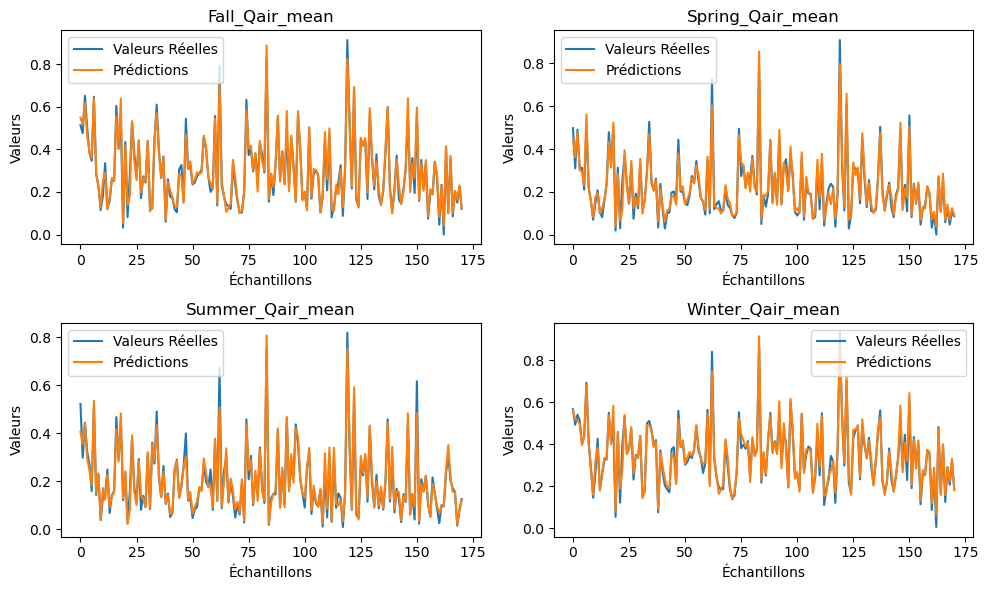

In [25]:

target = ['Fall_Qair_mean', 'Spring_Qair_mean', 'Summer_Qair_mean', 'Winter_Qair_mean']

# Visualisation
plt.figure(figsize=(10, 6))
for i, col in enumerate(target):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test[:, i], label="Valeurs Réelles")
    plt.plot(predictions[:, i], label="Prédictions")
    plt.title(f"{col}")
    plt.legend()
    plt.xlabel("Échantillons")
    plt.ylabel("Valeurs")

plt.tight_layout()
plt.show()


### **Sklearn Random Forest**

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation et entraînement du modèle
start_time =  time.time()
model = RandomForestRegressor(n_estimators=4, max_depth=10, random_state=42)
model.fit(X_train, y_train)
rf_sklearn_exe_time = time.time() - start_time

# Prédictions
predictions_sklearn = model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, predictions_sklearn)
rmse = np.sqrt(mean_squared_error(y_test, predictions_sklearn))
r2 = r2_score(y_test, predictions_sklearn)

print("MAE :", mae)
print("RMSE :", rmse)
print("R² Score :", r2)
print("execution time : ",rf_sklearn_exe_time)


MAE : 0.02396131363254485
RMSE : 0.03523411486330199
R² Score : 0.945890291134531
execution time :  0.06827759742736816


In [27]:
joblib.dump(model, "random_forest_model_sklearn.pkl")

['random_forest_model_sklearn.pkl']

### **Visualisation RF-sklearn**

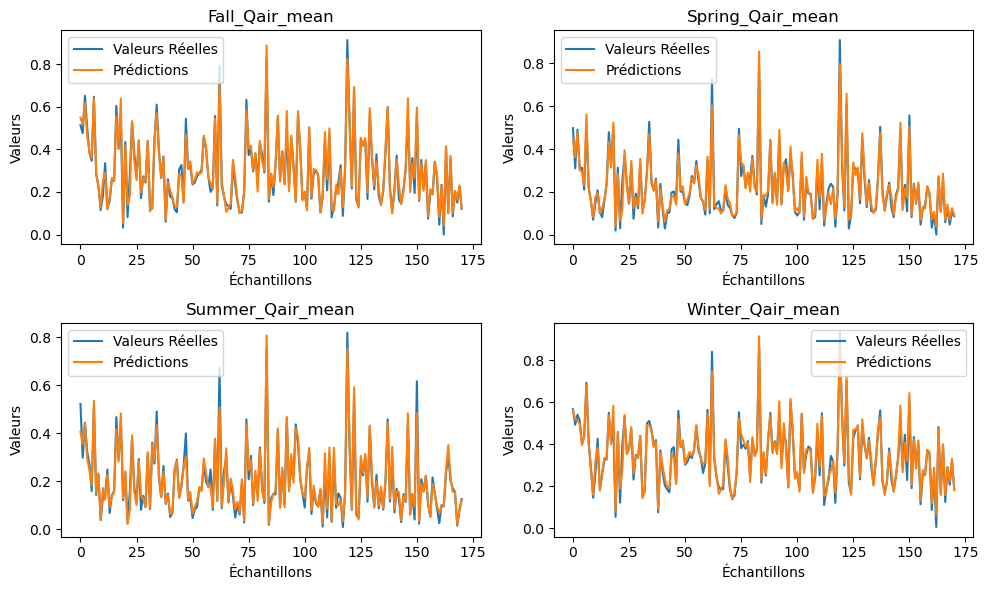

In [28]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))
for i, col in enumerate(target):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test[:, i], label="Valeurs Réelles")
    plt.plot(predictions[:, i], label="Prédictions")
    plt.title(f"{col}")
    plt.legend()
    plt.xlabel("Échantillons")
    plt.ylabel("Valeurs")

plt.tight_layout()
plt.show()

### **Comparaison RF et RF-sklearn**

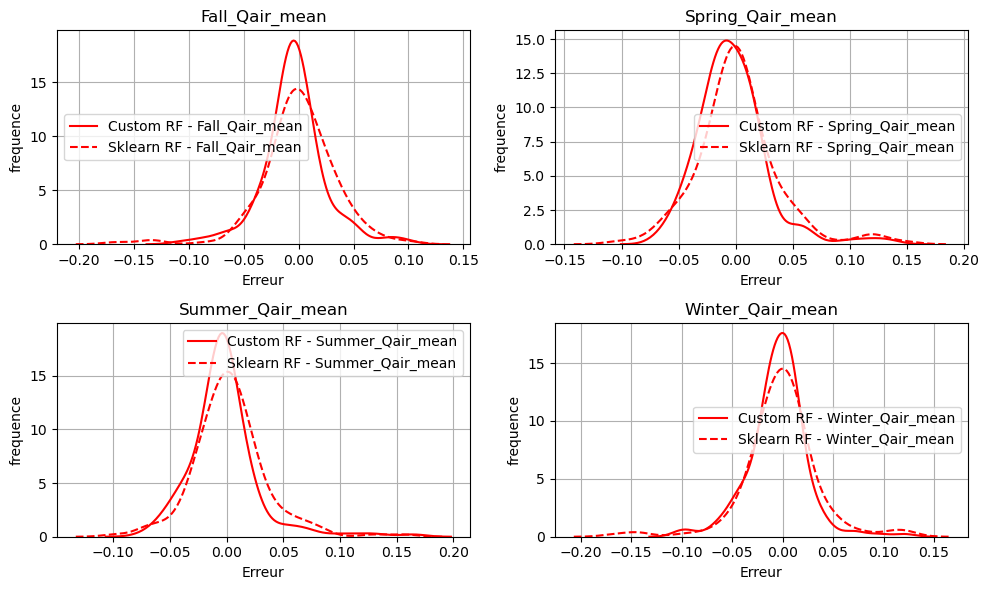

In [41]:
# Visualisation
plt.figure(figsize=(10, 6))
for i, col in enumerate(target):
    plt.subplot(2, 2, i + 1)
    plt.grid()
    sns.kdeplot(y_test[:, i] - predictions[:, i], color='red', label=f'Custom RF - {target[i]}')
    sns.kdeplot(y_test[:, i] - predictions_sklearn[:, i], color='red', linestyle='--', label=f'Sklearn RF - {target[i]}')
    plt.title(f"{col}")
    plt.legend()
    plt.xlabel("Erreur")
    plt.ylabel("frequence")


plt.tight_layout()
# plt.title("Comparaison des erreurs entre les modèles (Custom RF vs Sklearn RF)")
plt.show()